# 서울시 외국인 밀집지역 분석 시각화

**분석 기준**: 다이소 영업시간 10~22시 (v3)

**데이터 기간**: 2025년 1월 ~ 12월 (356일)

## 1. 라이브러리 및 데이터 로드

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

# 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Noto Sans KR'
plt.rcParams['axes.unicode_minus'] = False



print('라이브러리 로드 완료')

라이브러리 로드 완료


In [7]:
# 데이터 경로
DATA_PATH = '../TEMP_FOREIGNER/analysis_results/'

# 연간 종합 데이터 로드
yearly_file = DATA_PATH + 'daiso_analysis_2025_연간종합.xlsx'

monthly_df = pd.read_excel(yearly_file, sheet_name='월별_요약')
gu_avg_df = pd.read_excel(yearly_file, sheet_name='구별_평균_연간')
gu_ph_df = pd.read_excel(yearly_file, sheet_name='구별_PH_연간')
hourly_df = pd.read_excel(yearly_file, sheet_name='시간대별_연간')
combined_df = pd.read_excel(yearly_file, sheet_name='복합순위_연간')

print('데이터 로드 완료')
print(f'- 월별 요약: {len(monthly_df)}개월')
print(f'- 구별 데이터: {len(gu_avg_df)}개 구')

데이터 로드 완료
- 월별 요약: 12개월
- 구별 데이터: 25개 구


## 2. 월별 추이 분석

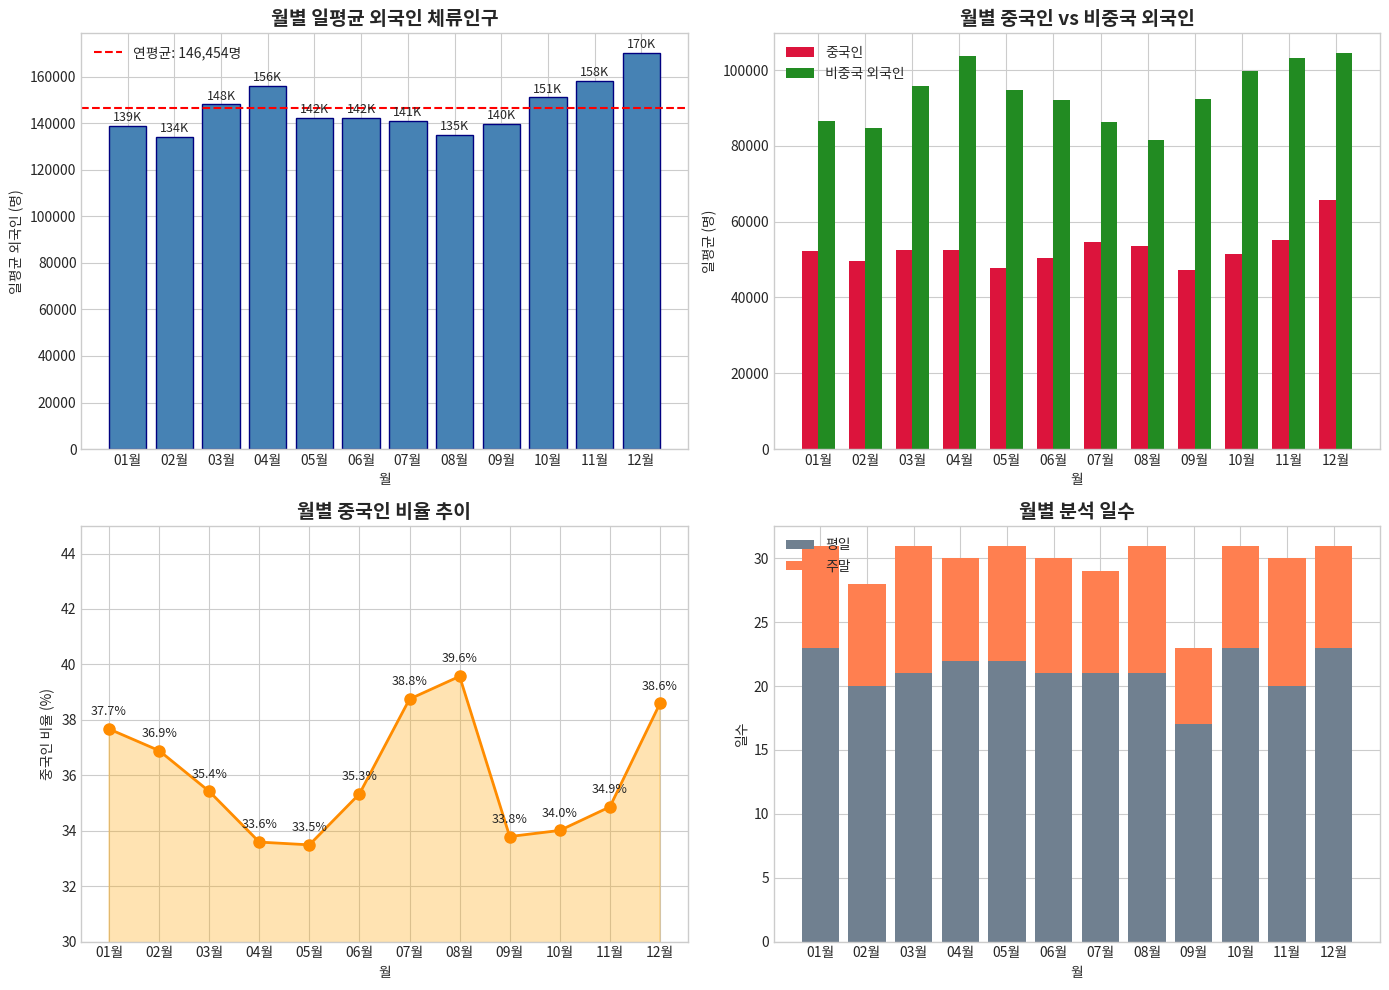

In [8]:
# 월 이름 변환
monthly_df['월_label'] = monthly_df['월'].astype(str).str[4:] + '월'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 2-1. 일평균 외국인 추이
ax1 = axes[0, 0]
ax1.bar(monthly_df['월_label'], monthly_df['일평균_외국인'], color='steelblue', edgecolor='navy')
ax1.set_title('월별 일평균 외국인 체류인구', fontsize=14, fontweight='bold')
ax1.set_xlabel('월')
ax1.set_ylabel('일평균 외국인 (명)')
ax1.axhline(y=monthly_df['일평균_외국인'].mean(), color='red', linestyle='--', label=f'연평균: {monthly_df["일평균_외국인"].mean():,.0f}명')
ax1.legend()
for i, v in enumerate(monthly_df['일평균_외국인']):
    ax1.text(i, v + 2000, f'{v/1000:.0f}K', ha='center', fontsize=9)

# 2-2. 중국인 vs 비중국 외국인
ax2 = axes[0, 1]
x = np.arange(len(monthly_df))
width = 0.35
ax2.bar(x - width/2, monthly_df['일평균_중국인'], width, label='중국인', color='crimson')
ax2.bar(x + width/2, monthly_df['일평균_비중국'], width, label='비중국 외국인', color='forestgreen')
ax2.set_title('월별 중국인 vs 비중국 외국인', fontsize=14, fontweight='bold')
ax2.set_xlabel('월')
ax2.set_ylabel('일평균 (명)')
ax2.set_xticks(x)
ax2.set_xticklabels(monthly_df['월_label'])
ax2.legend()

# 2-3. 중국인 비율 추이
ax3 = axes[1, 0]
ax3.plot(monthly_df['월_label'], monthly_df['중국인비율(%)'], marker='o', linewidth=2, markersize=8, color='darkorange')
ax3.fill_between(monthly_df['월_label'], monthly_df['중국인비율(%)'], alpha=0.3, color='orange')
ax3.set_title('월별 중국인 비율 추이', fontsize=14, fontweight='bold')
ax3.set_xlabel('월')
ax3.set_ylabel('중국인 비율 (%)')
ax3.set_ylim(30, 45)
for i, v in enumerate(monthly_df['중국인비율(%)']):
    ax3.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

# 2-4. 평일/주말 일수
ax4 = axes[1, 1]
ax4.bar(monthly_df['월_label'], monthly_df['평일일수'], label='평일', color='slategray')
ax4.bar(monthly_df['월_label'], monthly_df['주말일수'], bottom=monthly_df['평일일수'], label='주말', color='coral')
ax4.set_title('월별 분석 일수', fontsize=14, fontweight='bold')
ax4.set_xlabel('월')
ax4.set_ylabel('일수')
ax4.legend()

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_01_월별추이.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. 구별 외국인 밀집 순위

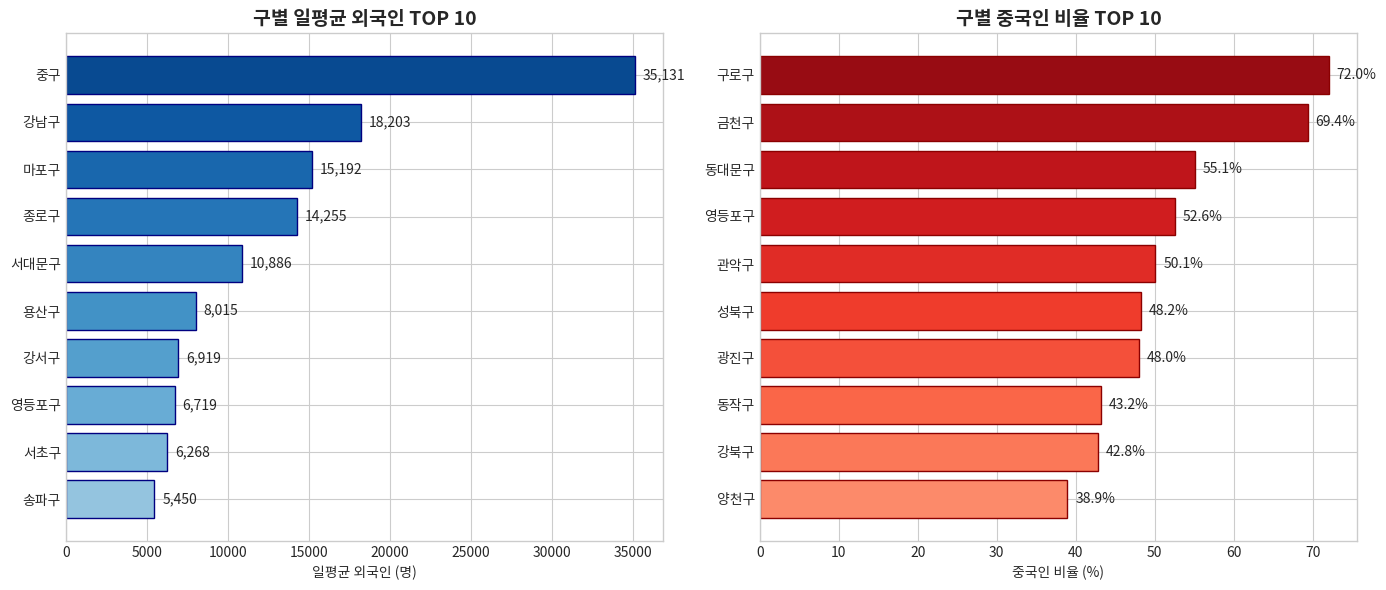

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 3-1. 외국인 TOP 10 (가로 막대)
ax1 = axes[0]
top10 = gu_avg_df.nlargest(10, '평균_외국인').sort_values('평균_외국인')
colors = plt.cm.Blues(np.linspace(0.4, 0.9, 10))
bars = ax1.barh(top10['자치구'], top10['평균_외국인'], color=colors, edgecolor='navy')
ax1.set_title('구별 일평균 외국인 TOP 10', fontsize=14, fontweight='bold')
ax1.set_xlabel('일평균 외국인 (명)')
for i, (bar, val) in enumerate(zip(bars, top10['평균_외국인'])):
    ax1.text(val + 500, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=10)

# 3-2. 중국인 비율 TOP 10
ax2 = axes[1]
china_top = gu_avg_df.nlargest(10, '중국인비율(%)').sort_values('중국인비율(%)')
colors2 = plt.cm.Reds(np.linspace(0.4, 0.9, 10))
bars2 = ax2.barh(china_top['자치구'], china_top['중국인비율(%)'], color=colors2, edgecolor='darkred')
ax2.set_title('구별 중국인 비율 TOP 10', fontsize=14, fontweight='bold')
ax2.set_xlabel('중국인 비율 (%)')
for bar, val in zip(bars2, china_top['중국인비율(%)']):
    ax2.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_02_구별순위.png', dpi=150, bbox_inches='tight')
plt.show()

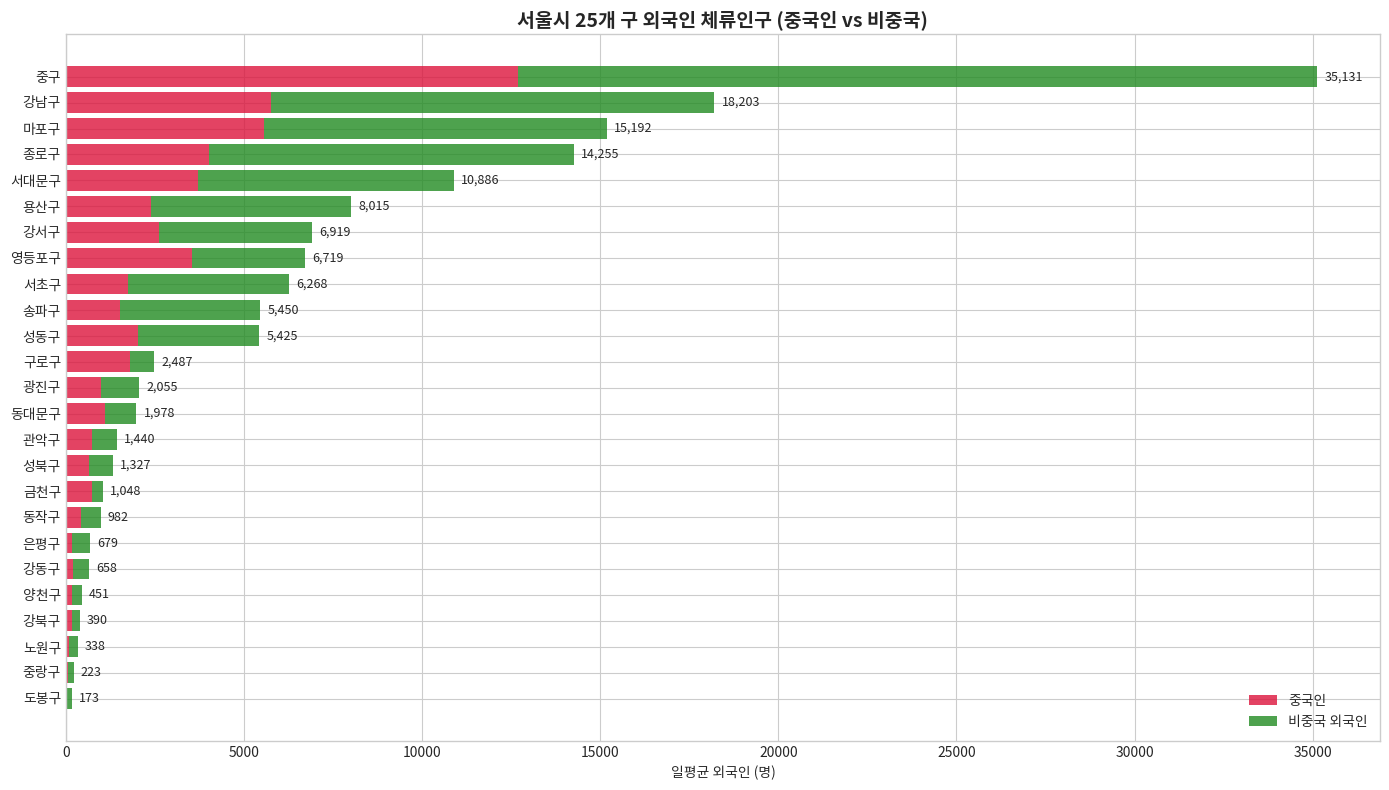

In [10]:
# 전체 25개 구 외국인 분포
fig, ax = plt.subplots(figsize=(14, 8))

gu_sorted = gu_avg_df.sort_values('평균_외국인', ascending=True)

# 스택 바 차트 (중국인 + 비중국)
ax.barh(gu_sorted['자치구'], gu_sorted['평균_중국인'], label='중국인', color='crimson', alpha=0.8)
ax.barh(gu_sorted['자치구'], gu_sorted['평균_비중국'], left=gu_sorted['평균_중국인'], label='비중국 외국인', color='forestgreen', alpha=0.8)

ax.set_title('서울시 25개 구 외국인 체류인구 (중국인 vs 비중국)', fontsize=14, fontweight='bold')
ax.set_xlabel('일평균 외국인 (명)')
ax.legend(loc='lower right')

# 총 외국인 수 표시
for i, (gu, total) in enumerate(zip(gu_sorted['자치구'], gu_sorted['평균_외국인'])):
    ax.text(total + 200, i, f'{total:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_03_구별_중국인비중국.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. 시간대별 분석 (피크타임)

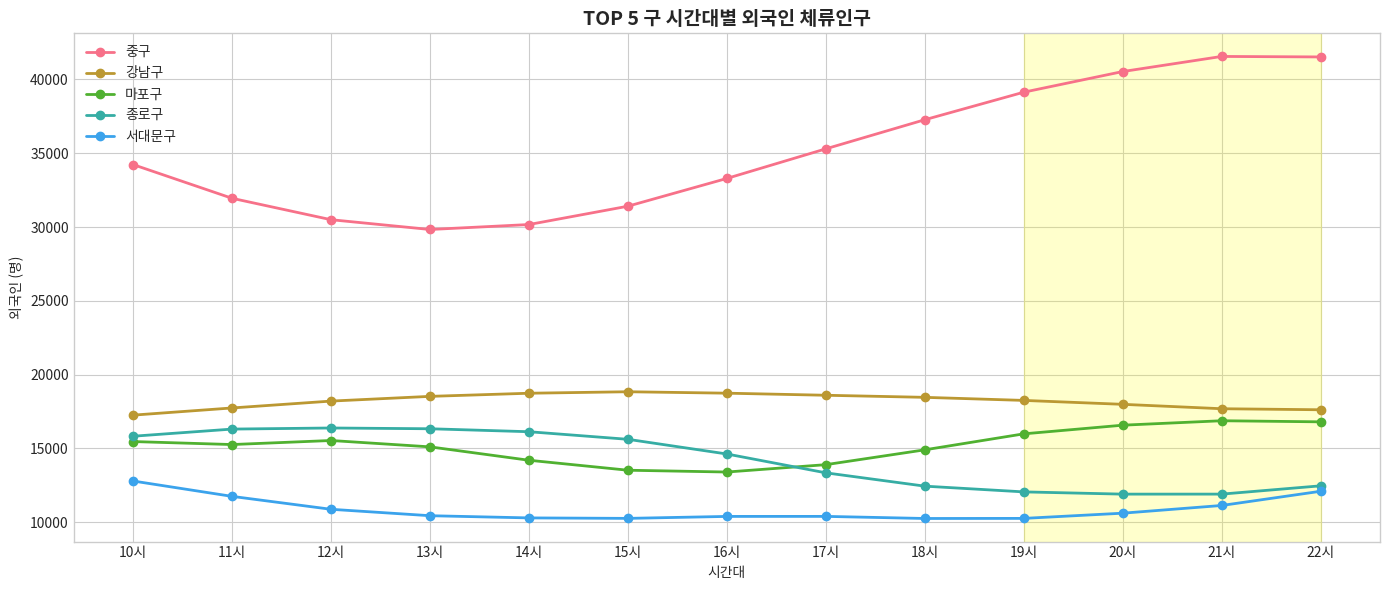

In [11]:
# TOP 5 구의 시간대별 외국인 분포
top5_gus = ['중구', '강남구', '마포구', '종로구', '서대문구']
hours = list(range(10, 23))

fig, ax = plt.subplots(figsize=(14, 6))

for gu in top5_gus:
    gu_data = hourly_df[hourly_df['자치구'] == gu]
    if len(gu_data) > 0:
        hourly_values = [gu_data[h].values[0] if h in gu_data.columns else 0 for h in hours]
        ax.plot(hours, hourly_values, marker='o', linewidth=2, markersize=6, label=gu)

ax.set_title('TOP 5 구 시간대별 외국인 체류인구', fontsize=14, fontweight='bold')
ax.set_xlabel('시간대')
ax.set_ylabel('외국인 (명)')
ax.set_xticks(hours)
ax.set_xticklabels([f'{h}시' for h in hours])
ax.legend(loc='upper left')
ax.axvspan(19, 22, alpha=0.2, color='yellow', label='피크타임')

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_04_시간대별_TOP5.png', dpi=150, bbox_inches='tight')
plt.show()

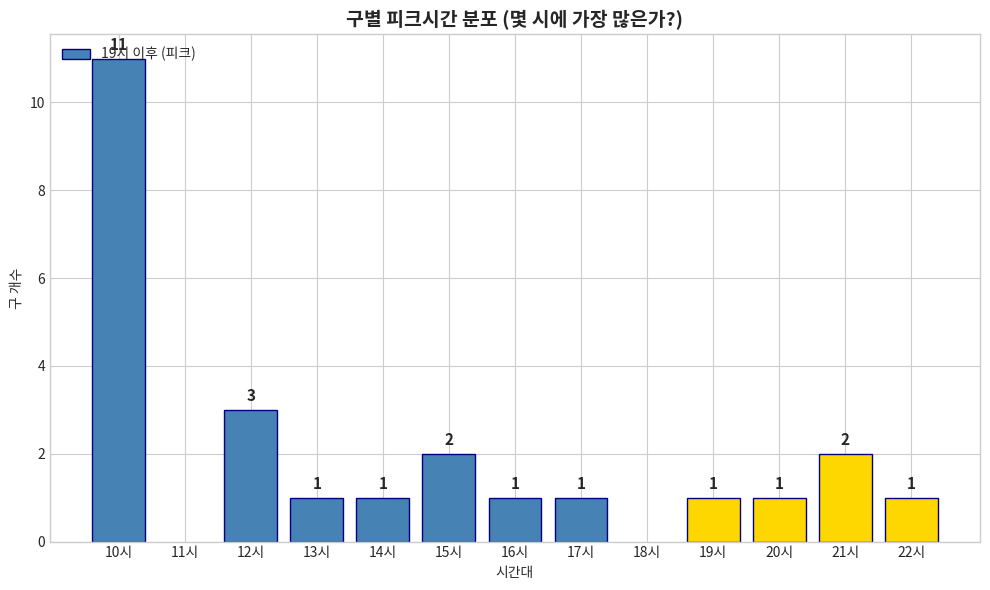

In [12]:
# 피크시간 분포
fig, ax = plt.subplots(figsize=(10, 6))

peak_counts = hourly_df['피크시간'].value_counts().sort_index()
colors = ['gold' if h >= 19 else 'steelblue' for h in peak_counts.index]

ax.bar(peak_counts.index, peak_counts.values, color=colors, edgecolor='navy')
ax.set_title('구별 피크시간 분포 (몇 시에 가장 많은가?)', fontsize=14, fontweight='bold')
ax.set_xlabel('시간대')
ax.set_ylabel('구 개수')
ax.set_xticks(range(10, 23))
ax.set_xticklabels([f'{h}시' for h in range(10, 23)])

for i, v in zip(peak_counts.index, peak_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center', fontsize=11, fontweight='bold')

ax.legend(['19시 이후 (피크)', '19시 이전'], loc='upper left')

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_05_피크시간분포.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Person-Hour 분석

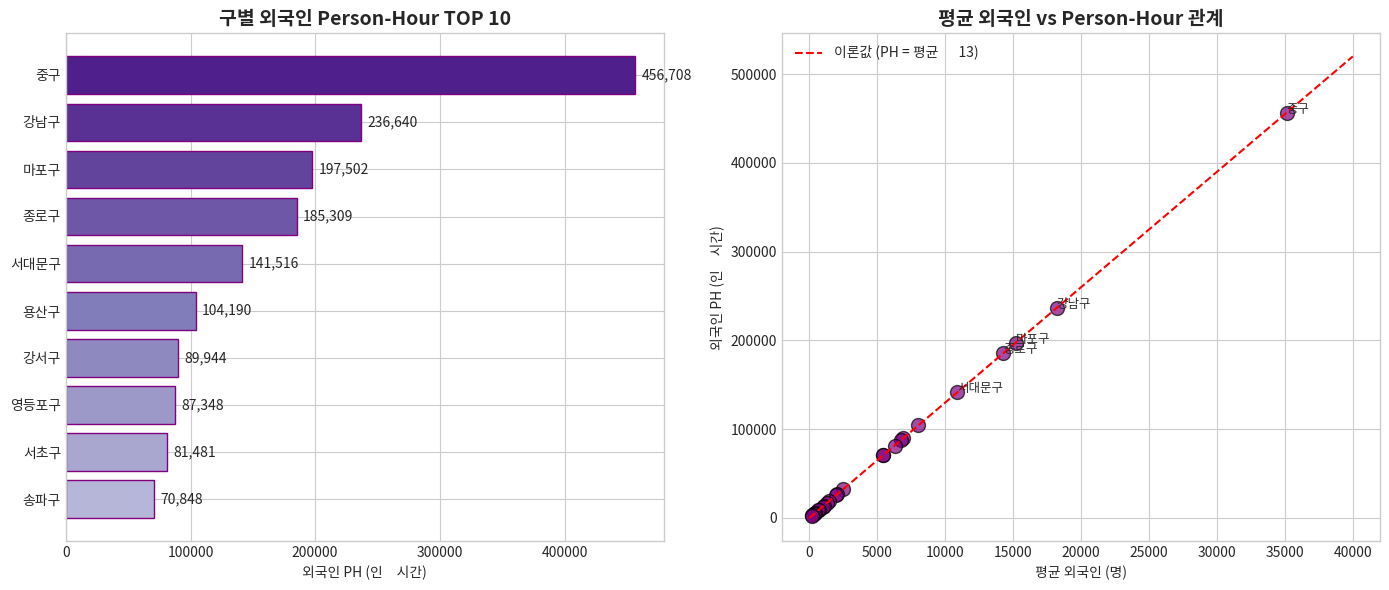

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 5-1. Person-Hour TOP 10
ax1 = axes[0]
ph_top10 = gu_ph_df.nlargest(10, '외국인_PH').sort_values('외국인_PH')
colors = plt.cm.Purples(np.linspace(0.4, 0.9, 10))
bars = ax1.barh(ph_top10['자치구'], ph_top10['외국인_PH'], color=colors, edgecolor='purple')
ax1.set_title('구별 외국인 Person-Hour TOP 10', fontsize=14, fontweight='bold')
ax1.set_xlabel('외국인 PH (인×시간)')
for bar, val in zip(bars, ph_top10['외국인_PH']):
    ax1.text(val + 5000, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', va='center', fontsize=10)

# 5-2. 평균 vs PH 비교 (산점도)
ax2 = axes[1]
ax2.scatter(gu_avg_df['평균_외국인'], gu_ph_df['외국인_PH'], s=100, c='purple', alpha=0.7, edgecolor='black')

# 추세선 (y = 13x)
x_line = np.linspace(0, 40000, 100)
ax2.plot(x_line, x_line * 13, 'r--', label='이론값 (PH = 평균 × 13)')

ax2.set_title('평균 외국인 vs Person-Hour 관계', fontsize=14, fontweight='bold')
ax2.set_xlabel('평균 외국인 (명)')
ax2.set_ylabel('외국인 PH (인×시간)')
ax2.legend()

# 주요 구 라벨
for i, row in gu_avg_df.head(5).iterrows():
    ph_val = gu_ph_df[gu_ph_df['자치구'] == row['자치구']]['외국인_PH'].values[0]
    ax2.annotate(row['자치구'], (row['평균_외국인'], ph_val), fontsize=9, ha='left')

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_06_PersonHour.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. 복합순위 분석 (외국인 + 유동량)

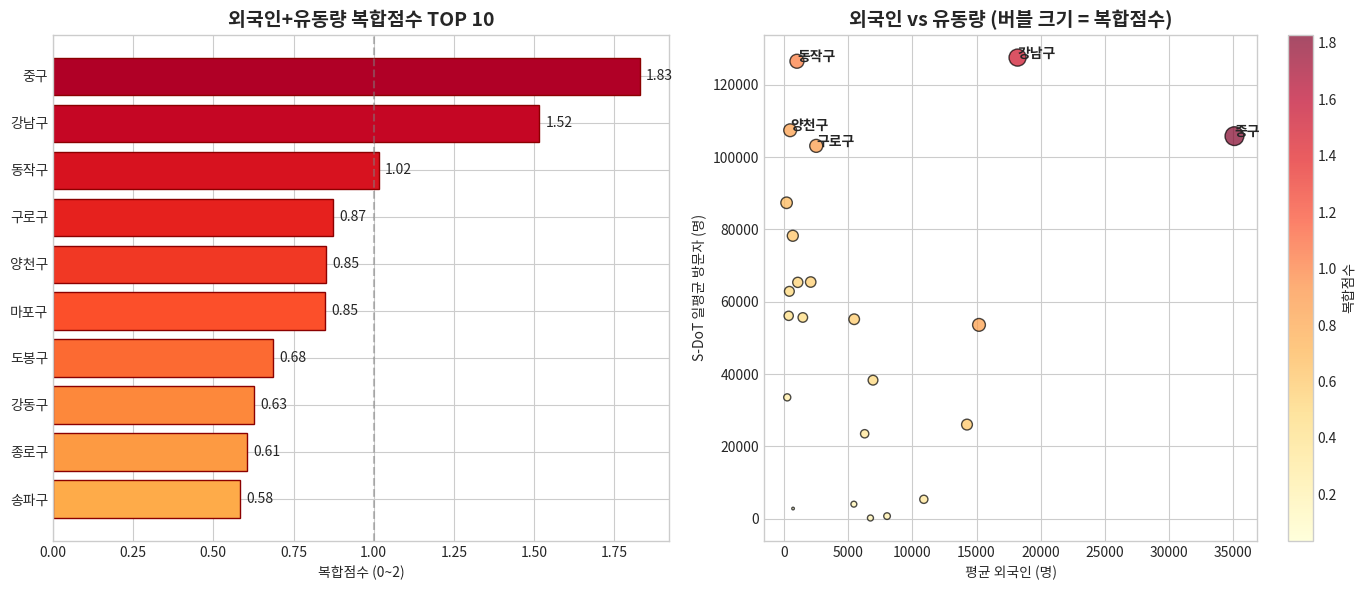

In [14]:
# 복합점수 TOP 10
combined_valid = combined_df.dropna(subset=['복합점수']).nlargest(10, '복합점수')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 6-1. 복합점수 막대그래프
ax1 = axes[0]
combined_sorted = combined_valid.sort_values('복합점수')
colors = plt.cm.YlOrRd(np.linspace(0.4, 0.9, 10))
bars = ax1.barh(combined_sorted['자치구'], combined_sorted['복합점수'], color=colors, edgecolor='darkred')
ax1.set_title('외국인+유동량 복합점수 TOP 10', fontsize=14, fontweight='bold')
ax1.set_xlabel('복합점수 (0~2)')
ax1.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)
for bar, val in zip(bars, combined_sorted['복합점수']):
    ax1.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center', fontsize=10)

# 6-2. 외국인 vs 유동량 산점도
ax2 = axes[1]
scatter = ax2.scatter(combined_df['평균_외국인'], combined_df['일평균_방문자'], 
                      s=combined_df['복합점수']*100, c=combined_df['복합점수'], 
                      cmap='YlOrRd', alpha=0.7, edgecolor='black')
ax2.set_title('외국인 vs 유동량 (버블 크기 = 복합점수)', fontsize=14, fontweight='bold')
ax2.set_xlabel('평균 외국인 (명)')
ax2.set_ylabel('S-DoT 일평균 방문자 (명)')
plt.colorbar(scatter, ax=ax2, label='복합점수')

# TOP 5 라벨
for _, row in combined_valid.head(5).iterrows():
    ax2.annotate(row['자치구'], (row['평균_외국인'], row['일평균_방문자']), 
                 fontsize=10, fontweight='bold', ha='left')

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_07_복합순위.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. 히트맵: 구별 시간대 외국인 분포

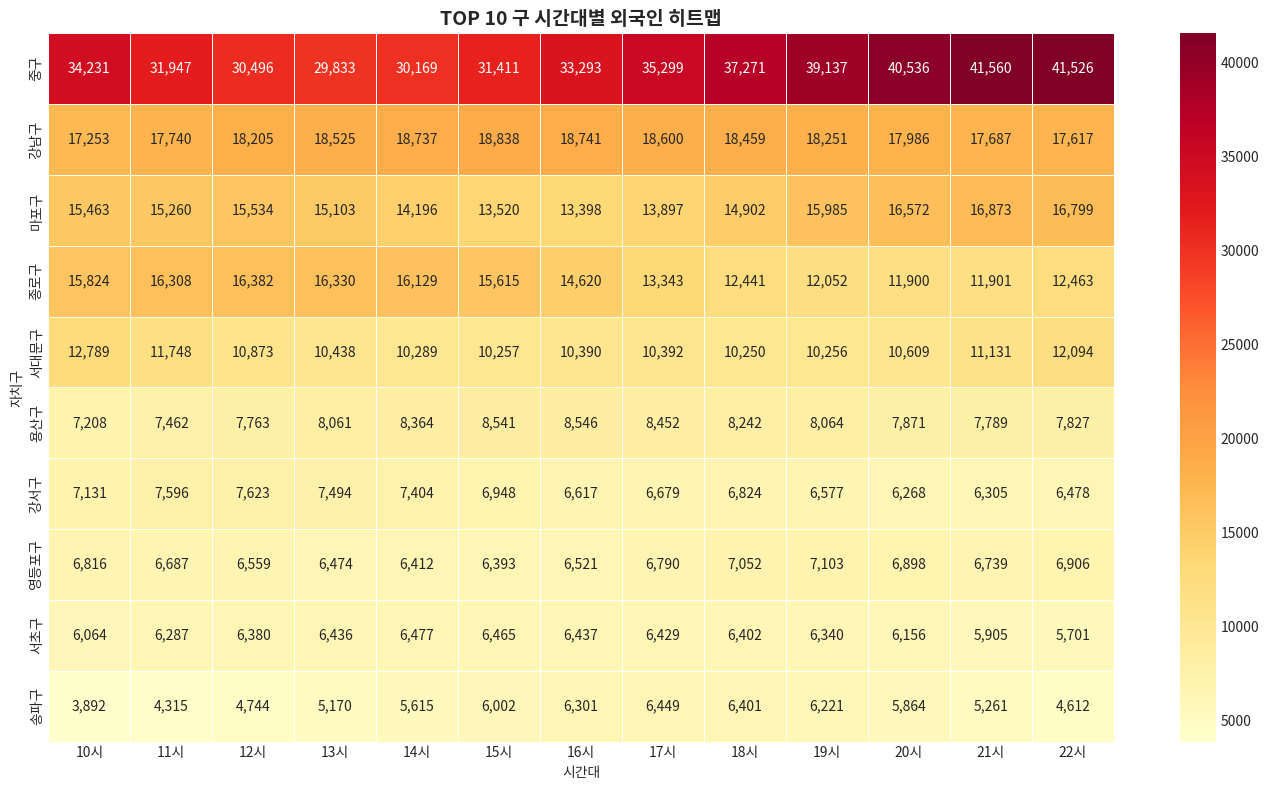

In [15]:
# 히트맵용 데이터 준비
hours = list(range(10, 23))
top10_gus = gu_avg_df.nlargest(10, '평균_외국인')['자치구'].tolist()

heatmap_data = []
for gu in top10_gus:
    gu_data = hourly_df[hourly_df['자치구'] == gu]
    if len(gu_data) > 0:
        row_data = [gu_data[h].values[0] if h in gu_data.columns else 0 for h in hours]
        heatmap_data.append(row_data)

heatmap_df = pd.DataFrame(heatmap_data, index=top10_gus, columns=[f'{h}시' for h in hours])

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(heatmap_df, annot=True, fmt=',.0f', cmap='YlOrRd', linewidths=0.5, ax=ax)
ax.set_title('TOP 10 구 시간대별 외국인 히트맵', fontsize=14, fontweight='bold')
ax.set_xlabel('시간대')
ax.set_ylabel('자치구')

plt.tight_layout()
plt.savefig(DATA_PATH + 'viz_08_히트맵.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. 종합 대시보드

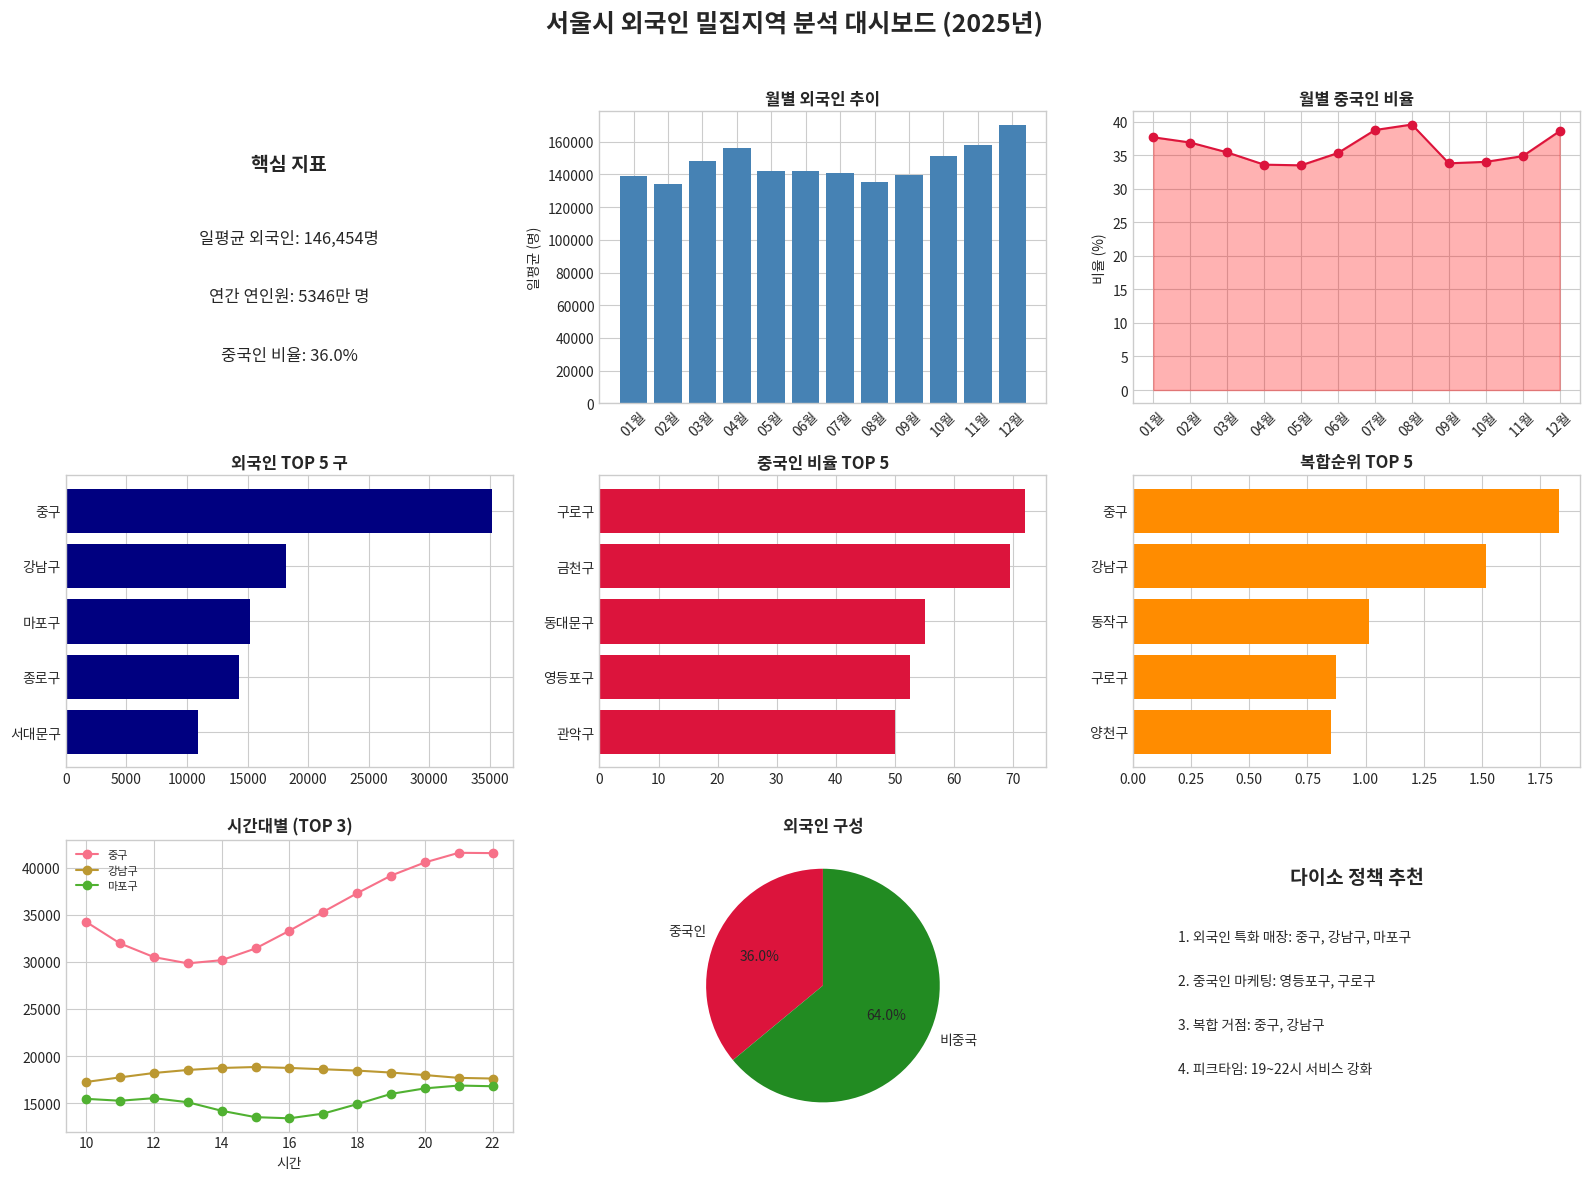

In [16]:
fig = plt.figure(figsize=(16, 12))

# 핵심 수치
yearly_avg = monthly_df['일평균_외국인'].mean()
yearly_china_ratio = monthly_df['일평균_중국인'].sum() / (monthly_df['일평균_중국인'].sum() + monthly_df['일평균_비중국'].sum()) * 100

# 1. 제목 영역
fig.suptitle('서울시 외국인 밀집지역 분석 대시보드 (2025년)', fontsize=18, fontweight='bold', y=0.98)

# 2. 핵심 지표 (텍스트)
ax_text = fig.add_subplot(3, 3, 1)
ax_text.axis('off')
ax_text.text(0.5, 0.8, '핵심 지표', fontsize=14, fontweight='bold', ha='center', transform=ax_text.transAxes)
ax_text.text(0.5, 0.55, f'일평균 외국인: {yearly_avg:,.0f}명', fontsize=12, ha='center', transform=ax_text.transAxes)
ax_text.text(0.5, 0.35, f'연간 연인원: {yearly_avg*365/10000:.0f}만 명', fontsize=12, ha='center', transform=ax_text.transAxes)
ax_text.text(0.5, 0.15, f'중국인 비율: {yearly_china_ratio:.1f}%', fontsize=12, ha='center', transform=ax_text.transAxes)

# 3. 월별 추이
ax1 = fig.add_subplot(3, 3, 2)
ax1.bar(monthly_df['월_label'], monthly_df['일평균_외국인'], color='steelblue')
ax1.set_title('월별 외국인 추이', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('일평균 (명)')

# 4. 중국인 비율 추이
ax2 = fig.add_subplot(3, 3, 3)
ax2.plot(monthly_df['월_label'], monthly_df['중국인비율(%)'], marker='o', color='crimson')
ax2.fill_between(monthly_df['월_label'], monthly_df['중국인비율(%)'], alpha=0.3, color='red')
ax2.set_title('월별 중국인 비율', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel('비율 (%)')

# 5. 구별 TOP 10
ax3 = fig.add_subplot(3, 3, 4)
top5 = gu_avg_df.nlargest(5, '평균_외국인')
ax3.barh(top5['자치구'], top5['평균_외국인'], color='navy')
ax3.set_title('외국인 TOP 5 구', fontsize=12, fontweight='bold')
ax3.invert_yaxis()

# 6. 중국인 비율 TOP 5
ax4 = fig.add_subplot(3, 3, 5)
china_top5 = gu_avg_df.nlargest(5, '중국인비율(%)')
ax4.barh(china_top5['자치구'], china_top5['중국인비율(%)'], color='crimson')
ax4.set_title('중국인 비율 TOP 5', fontsize=12, fontweight='bold')
ax4.invert_yaxis()

# 7. 복합순위 TOP 5
ax5 = fig.add_subplot(3, 3, 6)
combined_top5 = combined_df.dropna(subset=['복합점수']).nlargest(5, '복합점수')
ax5.barh(combined_top5['자치구'], combined_top5['복합점수'], color='darkorange')
ax5.set_title('복합순위 TOP 5', fontsize=12, fontweight='bold')
ax5.invert_yaxis()

# 8. 시간대별 TOP 3
ax6 = fig.add_subplot(3, 3, 7)
for gu in ['중구', '강남구', '마포구']:
    gu_data = hourly_df[hourly_df['자치구'] == gu]
    if len(gu_data) > 0:
        hourly_values = [gu_data[h].values[0] if h in gu_data.columns else 0 for h in hours]
        ax6.plot(hours, hourly_values, marker='o', label=gu)
ax6.set_title('시간대별 (TOP 3)', fontsize=12, fontweight='bold')
ax6.legend(loc='upper left', fontsize=8)
ax6.set_xlabel('시간')

# 9. 파이차트: 중국인 vs 비중국
ax7 = fig.add_subplot(3, 3, 8)
total_china = gu_avg_df['평균_중국인'].sum()
total_other = gu_avg_df['평균_비중국'].sum()
ax7.pie([total_china, total_other], labels=['중국인', '비중국'], autopct='%1.1f%%', 
        colors=['crimson', 'forestgreen'], startangle=90)
ax7.set_title('외국인 구성', fontsize=12, fontweight='bold')

# 10. 다이소 추천
ax8 = fig.add_subplot(3, 3, 9)
ax8.axis('off')
ax8.text(0.5, 0.85, '다이소 정책 추천', fontsize=14, fontweight='bold', ha='center', transform=ax8.transAxes)
ax8.text(0.1, 0.65, '1. 외국인 특화 매장: 중구, 강남구, 마포구', fontsize=10, transform=ax8.transAxes)
ax8.text(0.1, 0.50, '2. 중국인 마케팅: 영등포구, 구로구', fontsize=10, transform=ax8.transAxes)
ax8.text(0.1, 0.35, '3. 복합 거점: 중구, 강남구', fontsize=10, transform=ax8.transAxes)
ax8.text(0.1, 0.20, '4. 피크타임: 19~22시 서비스 강화', fontsize=10, transform=ax8.transAxes)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(DATA_PATH + 'viz_09_대시보드.png', dpi=150, bbox_inches='tight')
plt.show()

## 9. 생성된 시각화 파일 확인

In [17]:
import os

viz_files = [f for f in os.listdir(DATA_PATH) if f.startswith('viz_')]
print('생성된 시각화 파일 목록:')
for f in sorted(viz_files):
    print(f'  - {f}')

생성된 시각화 파일 목록:
  - viz_01_월별추이.png
  - viz_02_구별순위.png
  - viz_03_구별_중국인비중국.png
  - viz_04_시간대별_TOP5.png
  - viz_05_피크시간분포.png
  - viz_06_PersonHour.png
  - viz_07_복합순위.png
  - viz_08_히트맵.png
  - viz_09_대시보드.png


---
## 시각화 요약

| 파일명 | 내용 |
|--------|------|
| viz_01_월별추이.png | 월별 외국인/중국인 추이 |
| viz_02_구별순위.png | 외국인 TOP 10, 중국인비율 TOP 10 |
| viz_03_구별_중국인비중국.png | 25개 구 중국인 vs 비중국 스택 |
| viz_04_시간대별_TOP5.png | TOP 5 구 시간대별 추이 |
| viz_05_피크시간분포.png | 피크시간 분포 |
| viz_06_PersonHour.png | Person-Hour 분석 |
| viz_07_복합순위.png | 외국인+유동량 복합점수 |
| viz_08_히트맵.png | 구×시간대 히트맵 |
| viz_09_대시보드.png | 종합 대시보드 |